# Read from Excel

Terlampir excel 'quiz_2.xlx'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sqlite3
import time
print('install berhasil lur')

install berhasil lur


In [2]:
df1 = pd.read_excel('quiz_2.xlsx',sheet_name ='df1')
df2 = pd.read_excel('quiz_2.xlsx',sheet_name ='df2')
df3 = pd.read_excel('quiz_2.xlsx',sheet_name ='df3')

In [3]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales
0,142193,27in FHD Monitor,4,149.99,2019-01-01 09:08:00,599.96
1,145165,27in FHD Monitor,8,149.99,2019-01-01 09:58:00,1199.92
2,149929,27in 4K Gaming Monitor,2,389.99,2019-01-01 10:02:00,779.98
3,143699,27in 4K Gaming Monitor,8,389.99,2019-01-01 10:08:00,3119.92
4,144902,27in 4K Gaming Monitor,7,389.99,2019-01-01 10:23:00,2729.93


In [4]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales
0,146039,34in Ultrawide Monitor,5,379.99,2019-01-01 07:24:00,1899.95
1,142156,34in Ultrawide Monitor,10,379.99,2019-01-01 08:16:00,3799.90
2,149996,34in Ultrawide Monitor,8,379.99,2019-01-01 11:35:00,3039.92
3,142294,34in Ultrawide Monitor,9,379.99,2019-01-01 12:17:00,3419.91
4,150038,20in Monitor,7,109.99,2019-01-01 12:50:00,769.93


In [5]:
df3.head()

,Order ID,Purchase Address
0,146039,"53 River St, San Francisco, CA 94016"
1,142156,"540 2nd St, San Francisco, CA 94016"
2,142193,"912 Cherry St, Boston, MA 02215"
3,145165,"237 4th St, Boston, MA 02215"
4,149929,"167 Johnson St, New York City, NY 10001"


# Read from DB

Terlampir db 'quiz_2'

In [6]:
dbase=sqlite3.connect('quiz_2.db')
print("kebuka lur")
# fifa_data= pd.read_sql_query('SELECT * from fifa',dbase)
# fifa_data
df1 = pd.read_sql_query('SELECT * from df1',dbase)
df2 = pd.read_sql_query('SELECT * from df2',dbase)
df3 = pd.read_sql_query('SELECT * from df3',dbase)

kebuka lur


In [7]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales
0,142193,27in FHD Monitor,4,149.99,2019-01-01 09:08:00,599.96
1,145165,27in FHD Monitor,8,149.99,2019-01-01 09:58:00,1199.92
2,149929,27in 4K Gaming Monitor,2,389.99,2019-01-01 10:02:00,779.98
3,143699,27in 4K Gaming Monitor,8,389.99,2019-01-01 10:08:00,3119.92
4,144902,27in 4K Gaming Monitor,7,389.99,2019-01-01 10:23:00,2729.93


In [8]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales
0,146039,34in Ultrawide Monitor,5,379.99,2019-01-01 07:24:00,1899.95
1,142156,34in Ultrawide Monitor,10,379.99,2019-01-01 08:16:00,3799.90
2,149996,34in Ultrawide Monitor,8,379.99,2019-01-01 11:35:00,3039.92
3,142294,34in Ultrawide Monitor,9,379.99,2019-01-01 12:17:00,3419.91
4,150038,20in Monitor,7,109.99,2019-01-01 12:50:00,769.93


In [9]:
df3.head()

,Order ID,Purchase Address
0,146039,"53 River St, San Francisco, CA 94016"
1,142156,"540 2nd St, San Francisco, CA 94016"
2,142193,"912 Cherry St, Boston, MA 02215"
3,145165,"237 4th St, Boston, MA 02215"
4,149929,"167 Johnson St, New York City, NY 10001"


# Combine Data

1. Lihat format data pada table ```df1```, ```df2``` dan ```df3``` tersebut, 
2. pelajari format nya dan kemudian gabung ```df1```, ```df2``` dan ```df3``` menjadi satu table yang nama nya ```df```

In [10]:
nilai_df1=df1[['Order ID','Product','Quantity Ordered','Price Each','Order Date','Sales']]

In [11]:
nilai_df2=df2[['Order ID','Product','Quantity Ordered','Price Each','Order Date','Sales']]

In [12]:
dfcombine=[nilai_df1,nilai_df2,]

In [13]:
dfcombine= pd.concat(dfcombine)

In [14]:
df=dfcombine.merge(df3,on='Order ID', how='left')

In [15]:
# df.to_excel('output.xlsx')

In [16]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address
0,142193,27in FHD Monitor,4,149.99,2019-01-01 09:08:00,599.96,"912 Cherry St, Boston, MA 02215"
1,145165,27in FHD Monitor,8,149.99,2019-01-01 09:58:00,1199.92,"237 4th St, Boston, MA 02215"
2,149929,27in 4K Gaming Monitor,2,389.99,2019-01-01 10:02:00,779.98,"167 Johnson St, New York City, NY 10001"
3,143699,27in 4K Gaming Monitor,8,389.99,2019-01-01 10:08:00,3119.92,"409 Center St, San Francisco, CA 94016"
4,144902,27in 4K Gaming Monitor,7,389.99,2019-01-01 10:23:00,2729.93,"169 Ridge St, Seattle, WA 98101"


# Classification

Klasifikasan Product sebagai kolom baru ```Product_type``` Berdasarkan ```Price Each``` dan ```Kuartil (Q1, Q2, Q3)``` nya

1. Jika ```Price Each``` <= ```Q1-Price Each``` maka ```murah```


2. Jika ```Q1-Price Each``` > ```Price Each``` < ```Q2-Price Each``` maka ```sedang```


3. Jika ```Price Each``` >= ```Q3-Price Each```  maka ```mahal```

In [17]:
q = df['Sales'].quantile([.25, .5, .75]).values.tolist()
q1 = q[0]
q2= q[1]
q3=q[2]

In [18]:
print(q1,q2,q3)

599.96 1139.97 2279.94


In [19]:
def lur (zuu):
    if zuu <= q1 :
        return ('murah')
    elif zuu >= q1 and zuu<=q2:
        return('murah - sedang')
    elif zuu >=q2 and zuu<=q3:
        return('sedang - mahal')
    elif zuu >= q3:
        return('mahal')
    else:
        return

In [20]:
df['Sales_kuartil'] = df.Sales.apply(lambda x : lur(x))

In [21]:
df['Sales_kuartil'].head()

0             murah
1    sedang - mahal
2    murah - sedang
3             mahal
4             mahal
Name: Sales_kuartil, dtype: object

In [22]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Sales_kuartil
0,142193,27in FHD Monitor,4,149.99,2019-01-01 09:08:00,599.96,"912 Cherry St, Boston, MA 02215",murah
1,145165,27in FHD Monitor,8,149.99,2019-01-01 09:58:00,1199.92,"237 4th St, Boston, MA 02215",sedang - mahal
2,149929,27in 4K Gaming Monitor,2,389.99,2019-01-01 10:02:00,779.98,"167 Johnson St, New York City, NY 10001",murah - sedang
3,143699,27in 4K Gaming Monitor,8,389.99,2019-01-01 10:08:00,3119.92,"409 Center St, San Francisco, CA 94016",mahal
4,144902,27in 4K Gaming Monitor,7,389.99,2019-01-01 10:23:00,2729.93,"169 Ridge St, Seattle, WA 98101",mahal
...,...,...,...,...,...,...,...,...
24122,308268,20in Monitor,1,109.99,2019-12-31 21:00:00,109.99,"411 5th St, New York City, NY 10001",murah
24123,315129,34in Ultrawide Monitor,4,379.99,2019-12-31 21:42:00,1519.96,"675 Dogwood St, San Francisco, CA 94016",sedang - mahal
24124,308300,34in Ultrawide Monitor,5,379.99,2019-12-31 21:45:00,1899.95,"384 Jackson St, Los Angeles, CA 90001",sedang - mahal
24125,317104,20in Monitor,3,109.99,2019-12-31 22:15:00,329.97,"172 2nd St, San Francisco, CA 94016",murah


# Split Collumn

Split kolom 'Purchase Address' menjadi 3 kolom dengan delimeter nya adalah koma (,) dan kolom 'Purchase Address' di delete

*clue : bisa pakai regex atau metode lain*

1. Kolom ```Jalan```
2. Kolom ```Kota```
3. Kolom ```Zip Code```

In [23]:
df.dropna(inplace = True)

In [24]:
new = df["Purchase Address"].str.split(',', expand=True)[0]

In [25]:
new2 = df["Purchase Address"].str.split(',', expand=True)[1]

In [26]:
new3 = df["Purchase Address"].str.split(',', expand=True)[2]

In [27]:
df['Jalan']= new[0]

In [28]:
df['Kota']= new[1]

In [29]:
df['Zip Code']= new[2]

In [30]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Sales_kuartil,Jalan,Kota,Zip Code
0,142193,27in FHD Monitor,4,149.99,2019-01-01 09:08:00,599.96,"912 Cherry St, Boston, MA 02215",murah,912 Cherry St,237 4th St,167 Johnson St
1,145165,27in FHD Monitor,8,149.99,2019-01-01 09:58:00,1199.92,"237 4th St, Boston, MA 02215",sedang - mahal,912 Cherry St,237 4th St,167 Johnson St
2,149929,27in 4K Gaming Monitor,2,389.99,2019-01-01 10:02:00,779.98,"167 Johnson St, New York City, NY 10001",murah - sedang,912 Cherry St,237 4th St,167 Johnson St
3,143699,27in 4K Gaming Monitor,8,389.99,2019-01-01 10:08:00,3119.92,"409 Center St, San Francisco, CA 94016",mahal,912 Cherry St,237 4th St,167 Johnson St
4,144902,27in 4K Gaming Monitor,7,389.99,2019-01-01 10:23:00,2729.93,"169 Ridge St, Seattle, WA 98101",mahal,912 Cherry St,237 4th St,167 Johnson St


In [31]:
del(df['Purchase Address'])

# Month , Year Collumn

Buat kolom baru yaitu ```Month```, ```Month Name``` dan ```Year``` dari kolom ```Order Date```

In [32]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Sales_kuartil,Jalan,Kota,Zip Code
0,142193,27in FHD Monitor,4,149.99,2019-01-01 09:08:00,599.96,murah,912 Cherry St,237 4th St,167 Johnson St
1,145165,27in FHD Monitor,8,149.99,2019-01-01 09:58:00,1199.92,sedang - mahal,912 Cherry St,237 4th St,167 Johnson St
2,149929,27in 4K Gaming Monitor,2,389.99,2019-01-01 10:02:00,779.98,murah - sedang,912 Cherry St,237 4th St,167 Johnson St
3,143699,27in 4K Gaming Monitor,8,389.99,2019-01-01 10:08:00,3119.92,mahal,912 Cherry St,237 4th St,167 Johnson St
4,144902,27in 4K Gaming Monitor,7,389.99,2019-01-01 10:23:00,2729.93,mahal,912 Cherry St,237 4th St,167 Johnson St
...,...,...,...,...,...,...,...,...,...,...
24122,308268,20in Monitor,1,109.99,2019-12-31 21:00:00,109.99,murah,912 Cherry St,237 4th St,167 Johnson St
24123,315129,34in Ultrawide Monitor,4,379.99,2019-12-31 21:42:00,1519.96,sedang - mahal,912 Cherry St,237 4th St,167 Johnson St
24124,308300,34in Ultrawide Monitor,5,379.99,2019-12-31 21:45:00,1899.95,sedang - mahal,912 Cherry St,237 4th St,167 Johnson St
24125,317104,20in Monitor,3,109.99,2019-12-31 22:15:00,329.97,murah,912 Cherry St,237 4th St,167 Johnson St


In [33]:
new = df["Order Date"].str.split('-', expand=True)[0]

In [34]:
baru = df["Order Date"].str.split('-', expand=True)[1]

In [35]:
df['Year']= new[0]

In [36]:
df['Month']= baru

In [37]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Sales_kuartil,Jalan,Kota,Zip Code,Year,Month
0,142193,27in FHD Monitor,4,149.99,2019-01-01 09:08:00,599.96,murah,912 Cherry St,237 4th St,167 Johnson St,2019,01
1,145165,27in FHD Monitor,8,149.99,2019-01-01 09:58:00,1199.92,sedang - mahal,912 Cherry St,237 4th St,167 Johnson St,2019,01
2,149929,27in 4K Gaming Monitor,2,389.99,2019-01-01 10:02:00,779.98,murah - sedang,912 Cherry St,237 4th St,167 Johnson St,2019,01
3,143699,27in 4K Gaming Monitor,8,389.99,2019-01-01 10:08:00,3119.92,mahal,912 Cherry St,237 4th St,167 Johnson St,2019,01
4,144902,27in 4K Gaming Monitor,7,389.99,2019-01-01 10:23:00,2729.93,mahal,912 Cherry St,237 4th St,167 Johnson St,2019,01
...,...,...,...,...,...,...,...,...,...,...,...,...
24122,308268,20in Monitor,1,109.99,2019-12-31 21:00:00,109.99,murah,912 Cherry St,237 4th St,167 Johnson St,2019,12
24123,315129,34in Ultrawide Monitor,4,379.99,2019-12-31 21:42:00,1519.96,sedang - mahal,912 Cherry St,237 4th St,167 Johnson St,2019,12
24124,308300,34in Ultrawide Monitor,5,379.99,2019-12-31 21:45:00,1899.95,sedang - mahal,912 Cherry St,237 4th St,167 Johnson St,2019,12
24125,317104,20in Monitor,3,109.99,2019-12-31 22:15:00,329.97,murah,912 Cherry St,237 4th St,167 Johnson St,2019,12


In [38]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [39]:
df['Month Name'] = df['Order Date'].dt.strftime('%b')

In [40]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Sales_kuartil,Jalan,Kota,Zip Code,Year,Month,Month Name
0,142193,27in FHD Monitor,4,149.99,2019-01-01 09:08:00,599.96,murah,912 Cherry St,237 4th St,167 Johnson St,2019,01,Jan
1,145165,27in FHD Monitor,8,149.99,2019-01-01 09:58:00,1199.92,sedang - mahal,912 Cherry St,237 4th St,167 Johnson St,2019,01,Jan
2,149929,27in 4K Gaming Monitor,2,389.99,2019-01-01 10:02:00,779.98,murah - sedang,912 Cherry St,237 4th St,167 Johnson St,2019,01,Jan
3,143699,27in 4K Gaming Monitor,8,389.99,2019-01-01 10:08:00,3119.92,mahal,912 Cherry St,237 4th St,167 Johnson St,2019,01,Jan
4,144902,27in 4K Gaming Monitor,7,389.99,2019-01-01 10:23:00,2729.93,mahal,912 Cherry St,237 4th St,167 Johnson St,2019,01,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24122,308268,20in Monitor,1,109.99,2019-12-31 21:00:00,109.99,murah,912 Cherry St,237 4th St,167 Johnson St,2019,12,Dec
24123,315129,34in Ultrawide Monitor,4,379.99,2019-12-31 21:42:00,1519.96,sedang - mahal,912 Cherry St,237 4th St,167 Johnson St,2019,12,Dec
24124,308300,34in Ultrawide Monitor,5,379.99,2019-12-31 21:45:00,1899.95,sedang - mahal,912 Cherry St,237 4th St,167 Johnson St,2019,12,Dec
24125,317104,20in Monitor,3,109.99,2019-12-31 22:15:00,329.97,murah,912 Cherry St,237 4th St,167 Johnson St,2019,12,Dec


# Group
Grouping Data by Month, Month Name, Year, Product, Sales, Sum(Quantity Ordered), Sum(Sales), Count(Order ID)

In [41]:
dfgroup =df.groupby(['Month','Month Name','Year','Product']).agg({'Quantity Ordered':'sum'
,'Sales':'sum', 'Order ID' :'count'})

In [50]:
dfgroup

Quantity Ordered       Sales  \
Month Month Name Year Product                                                
01    Jan        2019 20in Monitor                        1216   133747.84   
                      27in 4K Gaming Monitor              1728   673902.72   
                      27in FHD Monitor                    2307   346026.93   
                      34in Ultrawide Monitor              1742   661942.58   
02    Feb        2019 20in Monitor                        1403   154315.97   
                      27in 4K Gaming Monitor              2320   904776.80   
                      27in FHD Monitor                    2613   391923.87   
                      34in Ultrawide Monitor              2241   851557.59   
03    Mar        2019 20in Monitor                        1779   195672.21   
                      27in 4K Gaming Monitor              2742  1069352.58   
                      27in FHD Monitor                    3402   510265.98   
                      34in Ultrawide Monitor              2819  1071191.81   
04    Apr        2019 20in Monitor                        2099   230869.01   
                      27in 4K Gaming Monitor              3090  1205069.10   
                      27in FHD Monitor                    3970   595460.30   
                      34in Ultrawide Monitor              3616  1374043.84   
05    May        2019 20in Monitor                        1856   204141.44   
                      27in 4K Gaming Monitor              3097  1207799.03   
                      27in FHD Monitor                    3776   566362.24   
                      34in Ultrawide Monitor              2994  1137690.06   
06    Jun        2019 20in Monitor                        1788   196662.12   
                      27in 4K Gaming Monitor              2619  1021383.81   
                      27in FHD Monitor                    3137   470518.63   
                      34in Ultrawide Monitor              2540   965174.60   
07    Jul        2019 20in Monitor                        1872   205901.28   
                      27in 4K Gaming Monitor              2752  1073252.48   
                      27in FHD Monitor                    3305   495716.95   
                      34in Ultrawide Monitor              2570   976574.30   
08    Aug        2019 20in Monitor                        1318   144966.82   
                      27in 4K Gaming Monitor              2458   958595.42   
                      27in FHD Monitor                    2686   402873.14   
                      34in Ultrawide Monitor              2095   796079.05   
09    Sep        2019 20in Monitor                        1475   162235.25   
                      27in 4K Gaming Monitor              2083   812349.17   
                      27in FHD Monitor                    2568   385174.32   
                      34in Ultrawide Monitor              2188   831418.12   
10    Oct        2019 20in Monitor                        2387   262546.13   
                      27in 4K Gaming Monitor              4002  1560739.98   
                      27in FHD Monitor                    4373   655906.27   
                      34in Ultrawide Monitor              3670  1394563.30   
11    Nov        2019 20in Monitor                        2312   254296.88   
                      27in 4K Gaming Monitor              3197  1246798.03   
                      27in FHD Monitor                    3966   594860.34   
                      34in Ultrawide Monitor              2952  1121730.48   
12    Dec        2019 20in Monitor                        3119   343058.81   
                      27in 4K Gaming Monitor              4765  1858302.35   
                      27in FHD Monitor                    5254   788047.46   
                      34in Ultrawide Monitor              4541  1725534.59   

                                              Order ID  
Month Month Name Year Product                           
01    Jan        2019 20in Moni

# Reporting

Buat report minimanl 3 berdasarkan data yang sudah olah dan gunakan visualisai

*olah datanya bisa di tambah jika teman teman rasa ada temuan atau insight lain dari data tersebut*

*visualisasi nya bisa gunakan di luar materi dan dapat di eksplore di (https://seaborn.pydata.org/)*


### Template setiap report nya
1. Visualisasi
2. Kesimpulan atau temuan dari visualisasi
3. Untuk Kesimpulan gunakan fitur markdown di jupyter (https://www.datacamp.com/tutorial/markdown-in-jupyter-notebook)



contoh :

In [45]:
# df.to_excel('data habis di olah.xlsx')

In [46]:
sns.set()

In [47]:
dfs = pd.read_excel('data habis di olah.xlsx',sheet_name ='Sheet1')

In [49]:
dfs

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Sales_kuartil,Jalan,Kota,Zip Code,Year,Month,Month Name
0,0,142193,27in FHD Monitor,4,149.99,2019-01-01 09:08:00,599.96,murah,912 Cherry St,237 4th St,167 Johnson St,2019,1,Jan
1,1,145165,27in FHD Monitor,8,149.99,2019-01-01 09:58:00,1199.92,sedang - mahal,912 Cherry St,237 4th St,167 Johnson St,2019,1,Jan
2,2,149929,27in 4K Gaming Monitor,2,389.99,2019-01-01 10:02:00,779.98,murah - sedang,912 Cherry St,237 4th St,167 Johnson St,2019,1,Jan
3,3,143699,27in 4K Gaming Monitor,8,389.99,2019-01-01 10:08:00,3119.92,mahal,912 Cherry St,237 4th St,167 Johnson St,2019,1,Jan
4,4,144902,27in 4K Gaming Monitor,7,389.99,2019-01-01 10:23:00,2729.93,mahal,912 Cherry St,237 4th St,167 Johnson St,2019,1,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24122,24122,308268,20in Monitor,1,109.99,2019-12-31 21:00:00,109.99,murah,912 Cherry St,237 4th St,167 Johnson St,2019,12,Dec
24123,24123,315129,34in Ultrawide Monitor,4,379.99,2019-12-31 21:42:00,1519.96,sedang - mahal,912 Cherry St,237 4th St,167 Johnson St,2019,12,Dec
24124,24124,308300,34in Ultrawide Monitor,5,379.99,2019-12-31 21:45:00,1899.95,sedang - mahal,912 Cherry St,237 4th St,167 Johnson St,2019,12,Dec
24125,24125,317104,20in Monitor,3,109.99,2019-12-31 22:15:00,329.97,murah,912 Cherry St,237 4th St,167 Johnson St,2019,12,Dec


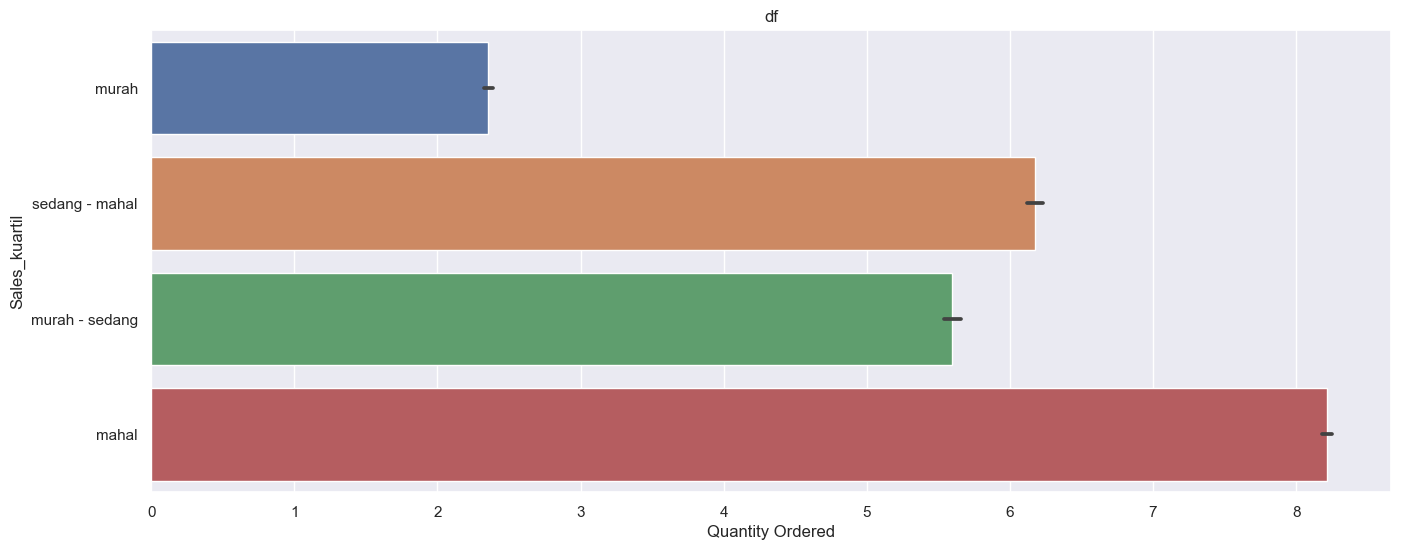

In [60]:
# Report 1
plt.figure(figsize=(16,6))

sns.barplot(x=df['Quantity Ordered'],y=df['Sales_kuartil'],estimator= ('mean'))

plt.title("df")


plt.xlabel("Quantity Ordered")
plt.ylabel("Sales_kuartil")


plt.show()

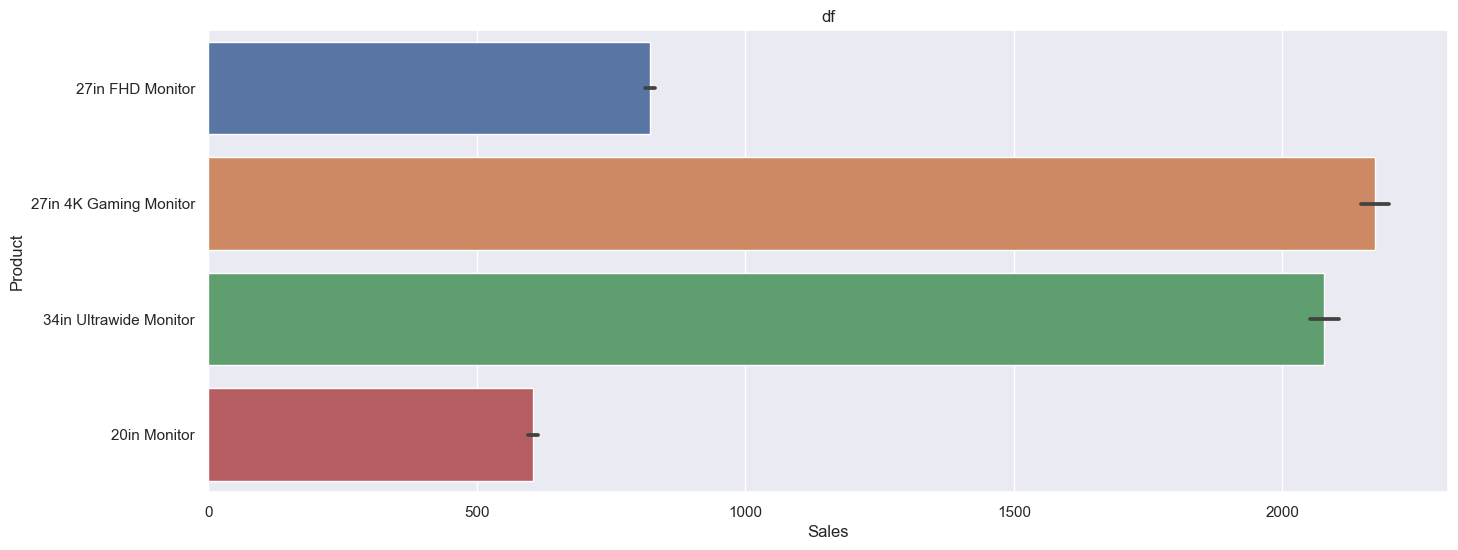

In [59]:
# Report 2
plt.figure(figsize=(16,6))

sns.barplot(x=df['Sales'],y=df['Product'])


plt.title("df")


plt.xlabel("Sales")
plt.ylabel("Product")


plt.show()

In [54]:
df.corr()

,Order ID,Quantity Ordered,Price Each,Sales
Order ID,1.000000,-0.007302,0.000045,-0.005762
Quantity Ordered,-0.007302,1.000000,0.005719,0.698850
Price Each,0.000045,0.005719,1.000000,0.638251
Sales,-0.005762,0.698850,0.638251,1.000000


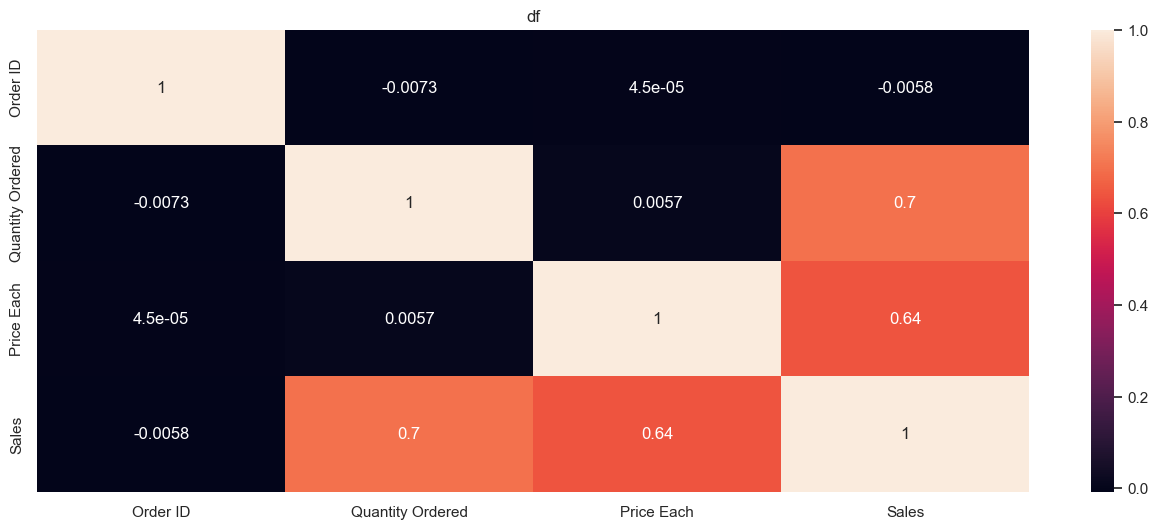

In [55]:
#report 3

plt.figure(figsize=(16,6))

sns.heatmap(data=df.corr(), annot=True)


plt.title("df")


plt.show()

### Kesimpulan

Report 1
banyak costumer yang membeli produk yang memiliki harga yang mahal dari pada yang murah

Report 2
Sales paling tinggi adalah 27in 4K Gaming Monitor
selanjutnya kedua paling tinggi adalah 34in Ultrawide Monitor
selanjutnya ketiga paling tinggi adalah 27in FHD Monitor
dan yang paling rendah adalah 20in Monitor


Report 3
dilihat heatmap
maka hal yang paling besar mempengaruhi pada sales adalah quantity ordered dan price each

# Tambahan untuk belajar SQL (sekarang tidak wajib)

Gunakan Python dan Pandas untuk insert data yang di group tadi ke SQLite dengan nama table ```summary_table``` buat syntax python nya di bawah